**Predict Total Customers**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_data_over_time.csv')
data

,Day,Total_Customers
0,1,106
1,2,104
2,3,134
3,4,123
4,5,129
...,...,...
195,196,1090
196,197,1093
197,198,1085
198,199,1109


In [61]:
data.describe()

,Day,Total_Customers
count,200.000000,200.000000
mean,100.500000,601.040000
std,57.879185,289.557171
min,1.000000,104.000000
25%,50.750000,348.000000
50%,100.500000,601.500000
75%,150.250000,844.750000
max,200.000000,1109.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Day              200 non-null    int64
 1   Total_Customers  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [63]:
data.isnull().sum()

Day                0
Total_Customers    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

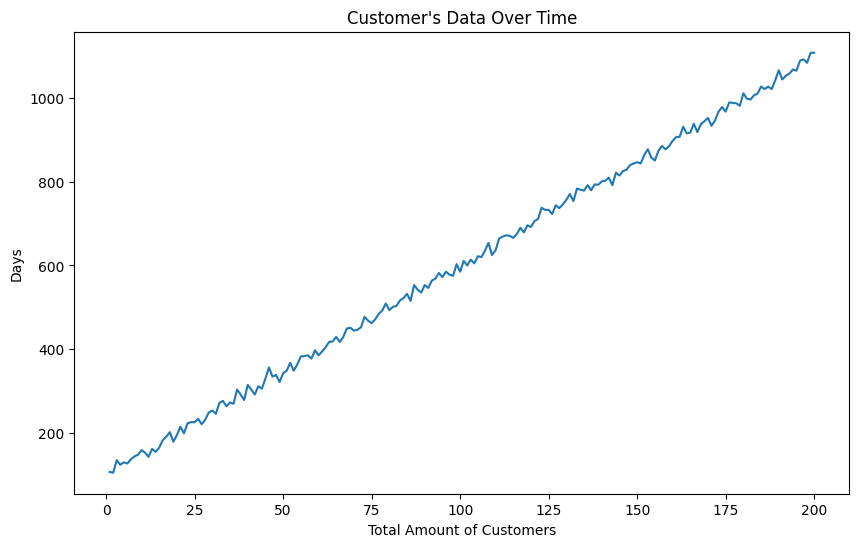

In [64]:
plt.figure(figsize=(10,6))
sns.lineplot(data, x="Day", y='Total_Customers')
plt.title("Customer's Data Over Time")
plt.xlabel('Total Amount of Customers')
plt.ylabel('Days')
plt.show

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression



In [66]:
x = data["Day"].values.reshape(-1,1) # (move the reshape here, so both x_train and x_test get converted to 2d array) convert it to become a 2d array a.k.a make this array have 1 column, and as many rows as needed.
y = data["Total_Customers"]

In [67]:
# we dont need to split the data here, just feed every data into the regression algorithm, because what we want to predict is days that is not yet known (200++)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [68]:
model = LinearRegression()
model = model.fit(x, y)

In [69]:
import numpy as np

# Create a prediction for the future
# this means we want to predict what are the Total_Customers for given days (201-501)
# so this code must be come after .fit() a.k.a trainig the model
sequence = np.arange(201, 501).reshape(-1,1) # <- reshape it into 2d array
future_predictions = model.predict(sequence) # <- start predicting
print(future_predictions)


[1103.54135678 1108.54137028 1113.54138378 1118.54139728 1123.54141079
 1128.54142429 1133.54143779 1138.54145129 1143.54146479 1148.54147829
 1153.54149179 1158.54150529 1163.54151879 1168.54153229 1173.54154579
 1178.54155929 1183.54157279 1188.54158629 1193.54159979 1198.54161329
 1203.54162679 1208.54164029 1213.54165379 1218.54166729 1223.54168079
 1228.54169429 1233.54170779 1238.54172129 1243.54173479 1248.54174829
 1253.54176179 1258.54177529 1263.54178879 1268.5418023  1273.5418158
 1278.5418293  1283.5418428  1288.5418563  1293.5418698  1298.5418833
 1303.5418968  1308.5419103  1313.5419238  1318.5419373  1323.5419508
 1328.5419643  1333.5419778  1338.5419913  1343.5420048  1348.5420183
 1353.5420318  1358.5420453  1363.5420588  1368.5420723  1373.5420858
 1378.5420993  1383.5421128  1388.5421263  1393.5421398  1398.5421533
 1403.5421668  1408.5421803  1413.5421938  1418.54220731 1423.54222081
 1428.54223431 1433.54224781 1438.54226131 1443.54227481 1448.54228831
 1453.542301

In [70]:
# next, we combine both the original days (1-200) and days we predicted (201-501)

all_days = np.arange(1, 501)
all_customers = np.concatenate([y, future_predictions])
predicted_data = pd.DataFrame({
    'Day': np.arange(1, 501),
    'Total_Customers': all_customers
})

predicted_data

,Day,Total_Customers
0,1,106.000000
1,2,104.000000
2,3,134.000000
3,4,123.000000
4,5,129.000000
...,...,...
495,496,2578.545339
496,497,2583.545353
497,498,2588.545366
498,499,2593.545380


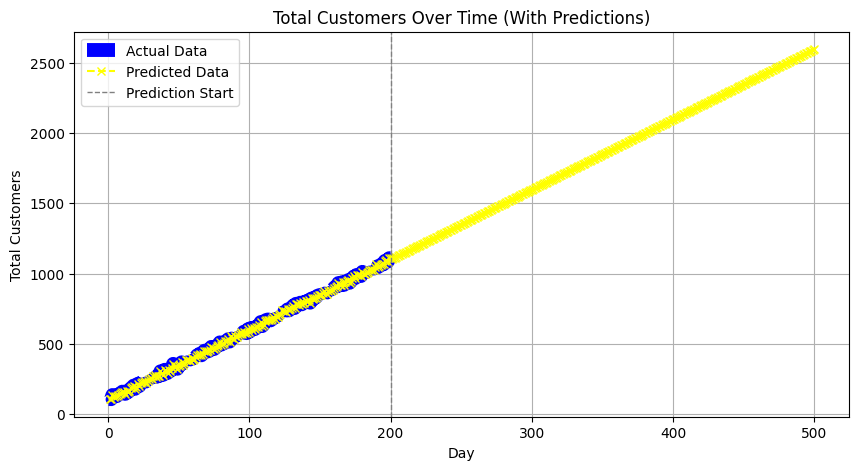

In [71]:
# now, if we plot the original data aand the predictions, voilaa..it follows the linear rule.👏
# Now you can change the number of days you want to predict.🚀
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='--', linewidth=10.0, color='blue', label='Actual Data')
plt.plot(predicted_data['Day'], predicted_data['Total_Customers'], marker='x', linestyle='--', color='yellow', label='Predicted Data')
plt.axvline(x=200, color='gray', linestyle='--', linewidth=1, label='Prediction Start')
plt.title('Total Customers Over Time (With Predictions)')
plt.xlabel('Day')
plt.ylabel('Total Customers')
plt.legend()
plt.grid(True)
plt.show()

# Now your task 📝
# Create a function to predict future sales

To create a function that predicts future sales, follow these instructions:

1. Define a function called `predict_future_sales` that takes `days_to_predict` as an argument.
2. Find the last day in the `data` DataFrame by using the `max()` function on the 'Day' column.
3. Create a numpy array called `future_days` using `np.arange()` to generate a sequence of days starting from the last day + 1 up to last day + `days_to_predict`.
4. Reshape the `future_days` array to have a shape of (-1, 1) using the `reshape()` function.
5. Use the `model` to predict the future sales by calling the appropriate method on the `model` object and passing in the `future_days` array.
6. Create a DataFrame called `predicted_data` using the `pd.DataFrame()` function and pass in a dictionary with two keys: 'Day' and 'Total_Customers'.
    - For the 'Day' column, use `np.arange()` to generate a sequence of days starting from the last day + 1 up to last day + `days_to_predict`.
    - For the 'Total_Customers' column, use the `future_predictions` array and convert it to integers using the `astype()` function.
7. Return the `predicted_data` DataFrame.

Make sure to replace the `blablabla` with the appropriate code.

In [72]:
def predict_future_sales(days_to_predict):
    last_day = data['Day'].max()
    future_days = np.arange(last_day + 1, last_day + days_to_predict + 1).reshape(-1, 1)
    future_predictions = model.blablabla(future_days)

    # Create a DataFrame for future predictions
    predicted_data = pd.blablabla({
        'Day': np.arange(last_day + 1, last_day + days_to_predict + 1),
        'Total_Customers': future_predictions.astype(int)
    })

    return blablabla

# Prompt user for input and cast the user input into number (int)
days_to_predict = int(input("How many days to predict? ")) 

# Get predictions
# Instruction :
# 1. call the predict_future_sales function with the days_to_predict as an argument
predicted_data = blablabla(blablabla)
print(predicted_data)

NameError: name 'blablabla' is not defined

**Cluster Tourism Data**

In [73]:
data2 = pd.read_csv('tourism_cluster_data.csv')
data2

,Annual Visitors (in thousands),Average Spend per Visitor (in USD),Satisfaction Rating
0,54.967142,516.204198,2.584629
1,48.617357,480.745886,3.579355
2,56.476885,466.153900,3.657285
3,65.230299,530.583814,3.197723
4,47.658466,551.549976,3.838714
...,...,...,...
195,521.556402,1840.620949,8.489984
196,458.510154,2115.414425,8.730125
197,492.386453,1959.390923,8.021236
198,464.975270,2074.229175,8.555707


In [74]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Annual Visitors (in thousands)      200 non-null    float64
 1   Average Spend per Visitor (in USD)  200 non-null    float64
 2   Satisfaction Rating                 200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [75]:
data2.describe()

,Annual Visitors (in thousands),Average Spend per Visitor (in USD),Satisfaction Rating
count,200.000000,200.000000,200.000000
mean,249.464511,1247.872239,6.711530
std,171.547701,559.904869,2.161102
min,30.403299,369.012745,2.081229
25%,106.907987,742.672352,4.807896
50%,230.480427,1237.247839,6.862480
75%,374.059502,1720.540722,8.585565
max,623.155232,2381.883328,10.000000


In [76]:
data2.isnull().sum()

Annual Visitors (in thousands)        0
Average Spend per Visitor (in USD)    0
Satisfaction Rating                   0
dtype: int64

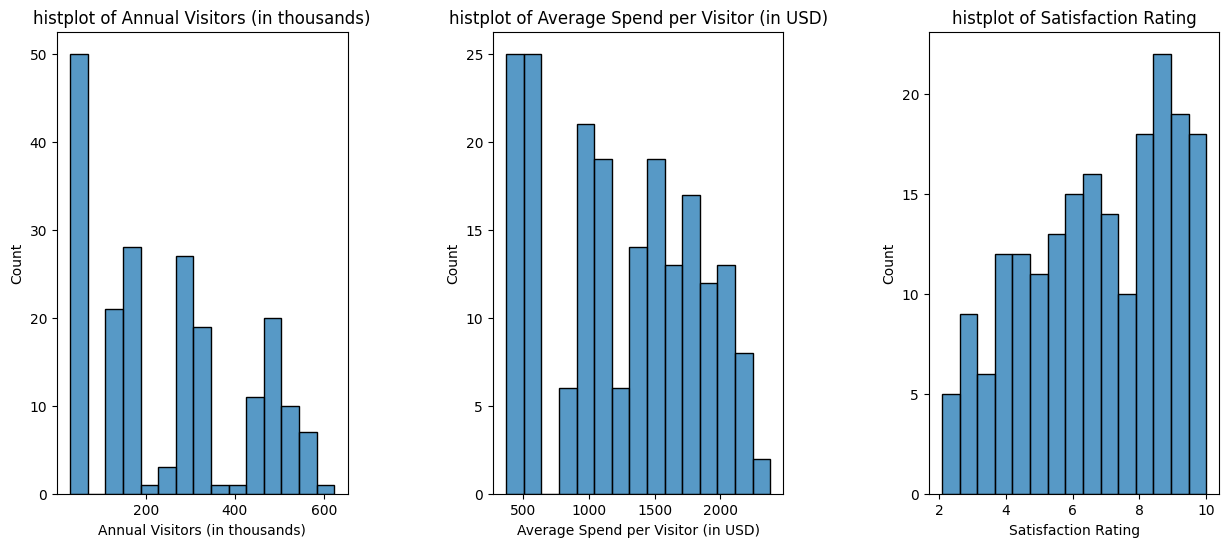

In [77]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Annual Visitors (in thousands)' , 'Average Spend per Visitor (in USD)' , 'Satisfaction Rating']:
   n += 1
   plt.subplot(1 , 3 , n)
   plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
   sns.histplot(data2[x] , bins = 15)
   plt.title('histplot of {}'.format(x))
plt.show()

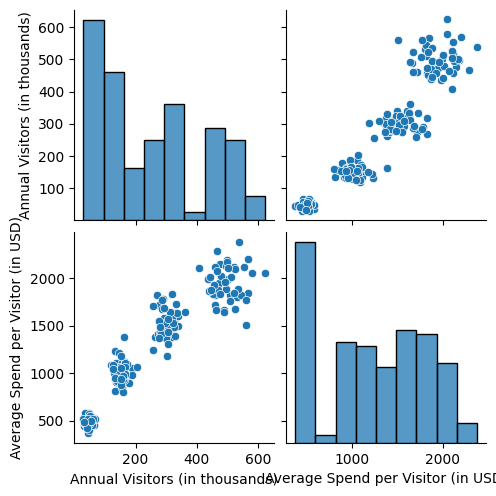

In [78]:
sns.pairplot(data2, vars = ['Annual Visitors (in thousands)' , 'Average Spend per Visitor (in USD)'])

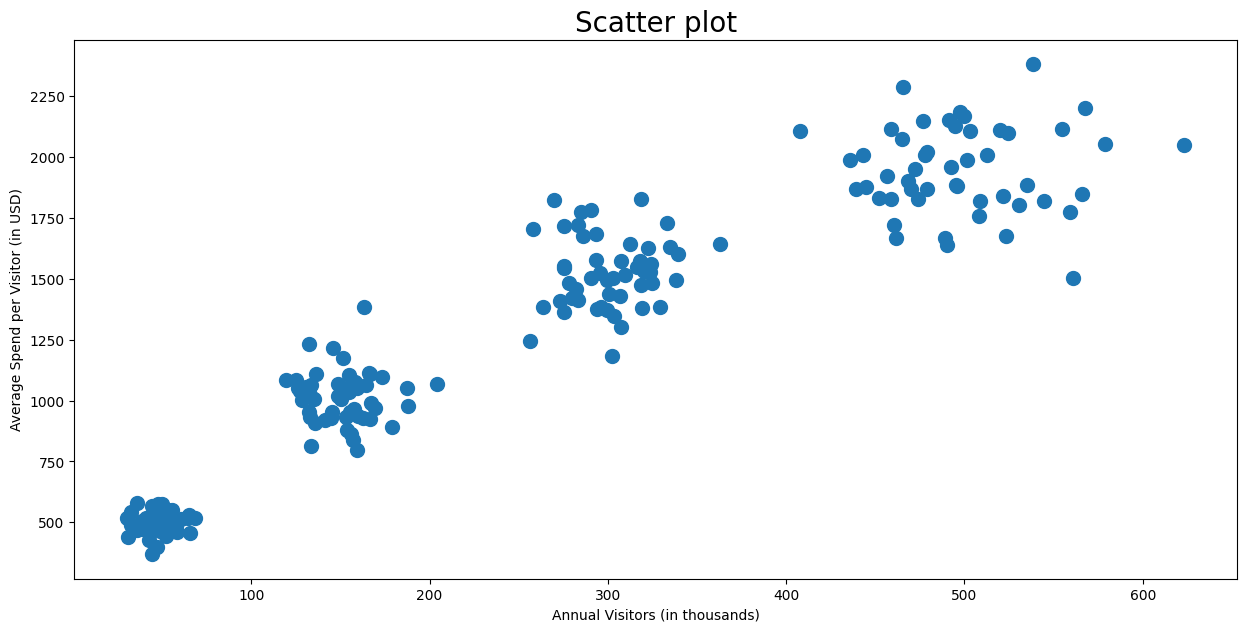

In [79]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot', fontsize = 20)
plt.xlabel('Annual Visitors (in thousands)')
plt.ylabel('Average Spend per Visitor (in USD)')
plt.scatter( x = 'Annual Visitors (in thousands)', y = 'Average Spend per Visitor (in USD)', data = data2, s = 100)
plt.show()

In [80]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [81]:
X1 = data2[['Annual Visitors (in thousands)' , 'Average Spend per Visitor (in USD)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):

   algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
   algorithm.fit(X1)
   inertia.append(algorithm.inertia_)

inertia

/mnt/c/Users/mfitrahrmd/Documents/coding/maxi/env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1414: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[68241493.23543462,
 15432036.563389795,
 7734095.5358484015,
 2907472.8212117567,
 1930182.33622581,
 1506176.0201990446,
 1176818.4478392343,
 992432.310781206,
 821305.6044431193,
 704739.355665292,
 621880.5552072908,
 567254.2835687373,
 484074.79386126716,
 435853.4050851277]

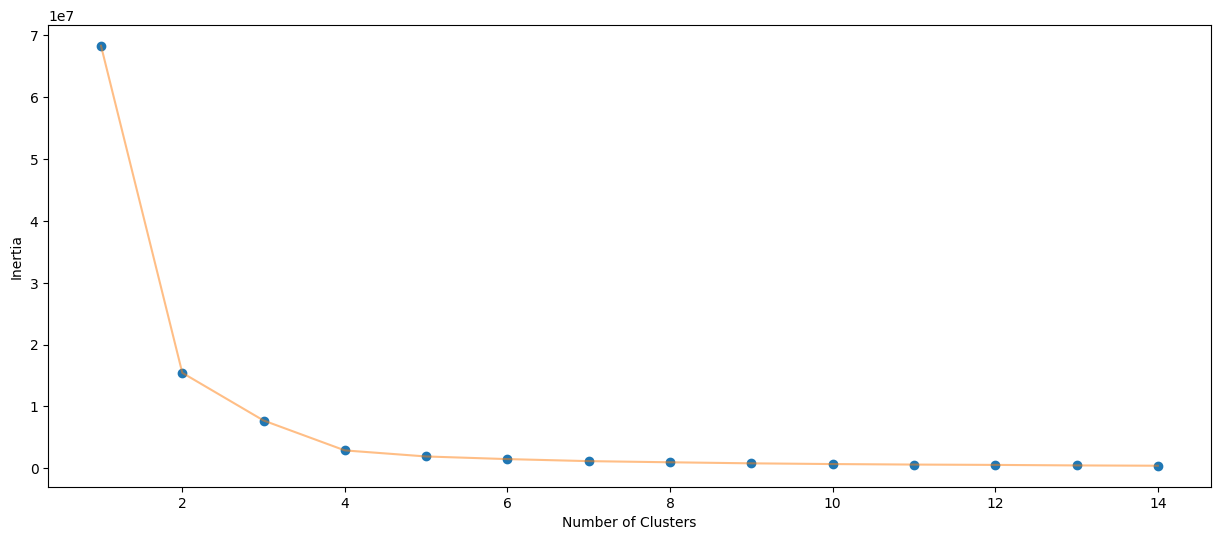

In [82]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# i think 4 clusters is better for this case
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                       tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [84]:
h = 0.5 # just change it to 0.5
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

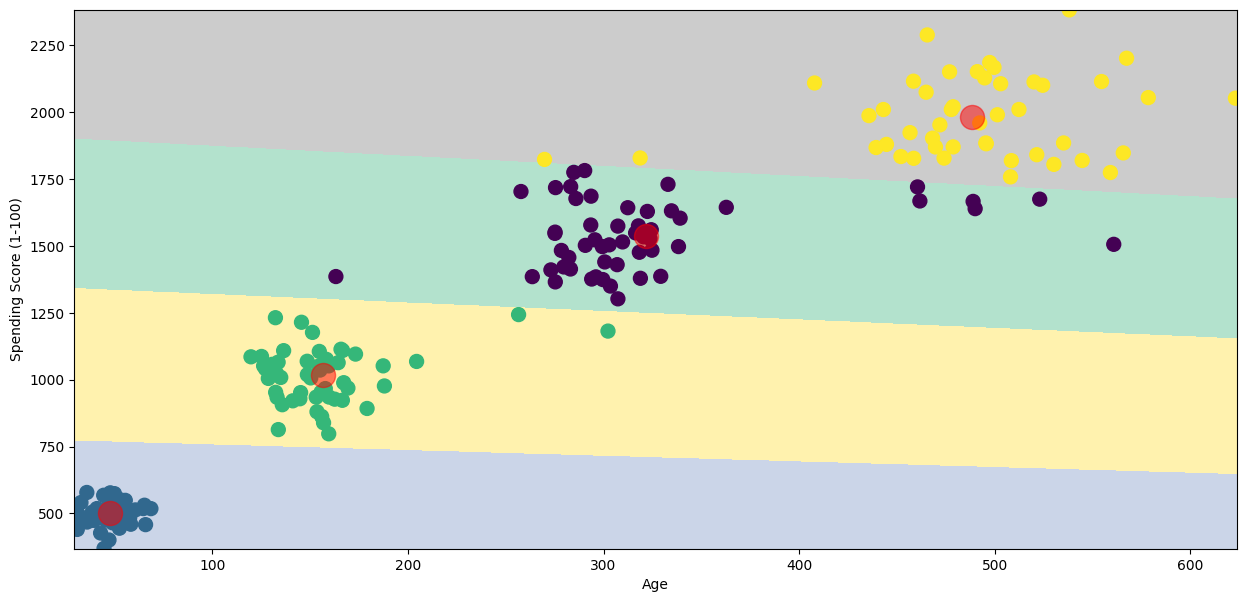

In [85]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Annual Visitors (in thousands)', y =  'Average Spend per Visitor (in USD)', data = data2, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [86]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
   x= data2['Annual Visitors (in thousands)'],
   y= data2['Average Spend per Visitor (in USD)'],
   z= data2['Satisfaction Rating'],
   mode='markers',
    marker=dict(
       color = data2['Satisfaction Rating'],
       size= 10,
       line=dict(
           color= data2['Satisfaction Rating'],
           width= 12
       ),
       opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
   title= 'Clusters wrt Age, Income and Spending Scores',
   scene = dict(
           xaxis = dict(title  = 'Age'),
           yaxis = dict(title  = 'Spending Score'),
           zaxis = dict(title  = 'Annual Income')
       )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)